In [1]:
!python -V
!pip show jupyterlab pandas plotly cufflinks seaborn openpyxl itables lxml pyarrow pip

Python 3.10.7
Name: jupyterlab
Version: 3.5.0
Summary: JupyterLab computational environment
Home-page: https://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: 
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: ipython, jinja2, jupyter-core, jupyter-server, jupyterlab-server, nbclassic, notebook, packaging, tomli, tornado
Required-by: 
---
Name: pandas
Version: 1.5.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: cufflinks, itables, seaborn
---
Name: plotly
Version: 5.11.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: 

# <center>**LIBRERIAS Y FUNCIONES**</center>

In [2]:
# ocultar los warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import random
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

from utilidades import crear_dataframes, join_dataframe

df1, df2, df3 = crear_dataframes(limite_muestra = 100)

<IPython.core.display.Javascript object>

# <center>**LEER ARCHIVOS Y CONVERTIRLOS EN DATAFRAME**</center>

# <center>**JSON**</center>

In [3]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/json_dataframe.json'
json = pd.read_json(archivo)
json

Id  Lider     Mamíferos                         Reptiles  \
0     1     42         Vacas  Lagartos voladores australianos   
1     2     32    Chimpancés                       Camaleones   
2     3     41        Leones                       Cocodrilos   
3     4     94         Vacas               Lagartijas comunes   
4     5     14       Ratones                          Iguanas   
..  ...    ...           ...                              ...   
95   96     75      Ballenas           Mosasaurios (extintos)   
96   97     79  Rinocerontes                       Cocodrilos   
97   98     14      Canguros                       Cocodrilos   
98   99     34        Cabras        Tuátaras de Nueva Zelanda   
99  100     16      Caballos                         Luciones   

                    Peces                     Anfibios        Aves  
0           Koi japoneses                     Cecilias  Guacamayas  
1                  Atunes                   Gallipatos       Loros  
2                  Carpas          Ranas de Seychelles     Buitres  
3           Koi japoneses  Salamandras gigantes chinas   Pelícanos  
4   Celacantos (extintos)              Ranas de Darwin     Tucanes  
..                    ...                          ...         ...  
95              Lenguados          Ranas de Seychelles    Cigüeñas  
96         Peces abisales                     Ajolotes       Loros  
97         Peces abisales          Ranas de Seychelles  Avestruces  
98             Peces sapo          Ranas de Seychelles    Canarios  
99         Peces abisales          Ranas de Seychelles    Gallinas  

[100 rows x 7 columns]

# <center>**CSV**</center>

In [4]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/csv_dataframe.csv'
csv = pd.read_csv(archivo)
csv

Id  Lider                  Vertebrados         Invertebrados  Ovíparos  \
0     1     96      Sapos de caña venenosos      Moscas cernícalo   Hornero   
1     2     67                      Jirafas              Hormigas     Ganso   
2     3      5                      Tucanes         Avispa scolia   Gallina   
3     4     79               Sapos gigantes  Mariposa saltacercas    Paloma   
4     5     68           Dragones de Komodo              Pulgones    Salmón   
..  ...    ...                          ...                   ...       ...   
95   96     45                      Gorilas                Termes    Salmón   
96   97      5                      Pirañas             Mosquitos      Loro   
97   98     72                     Luciones      Abeja de la miel    Salmón   
98   99     59  Salamandras gigantes chinas  Caballito del diablo   Cigüeña   
99  100     21                        Vacas         Avispa scolia  Pingüino   

           Frugívoros             Rumiantes  
0              Bonobo      Ciervo de copete  
1               Tapir     Bisonte estepario  
2              Perico                Vicuña  
3               Lémur             Sitatunga  
4               Tucán             Sitatunga  
..                ...                   ...  
95          Zarigüeya  Antílope jeroglífico  
96          Zarigüeya                  Oryx  
97              Tucán                  Cebú  
98  Mosca de la fruta                  Toro  
99   Conejo del campo       Venado temazate  

[100 rows x 7 columns]

# <center>**EXCEL**</center>

In [5]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
pd.read_excel(archivo, engine="openpyxl")

Id  Lider     Mamíferos                 Reptiles                  Peces  \
0     1      1    Chimpancés       Tortugas acuáticas  Los tiburones ballena   
1     2     28    Chimpancés               Camaleones              Tiburones   
2     3     93         Vacas       Tortugas acuáticas              Tiburones   
3     4     31       Ratones  Pterosaurios (extintos)              Tiburones   
4     5     32      Ballenas       Tortugas acuáticas           Peces payaso   
..  ...    ...           ...                      ...                    ...   
95   96     81         Vacas       Tortugas acuáticas           Peces espada   
96   97     41  Rinocerontes   Mosasaurios (extintos)                 Atunes   
97   98     93        Leones      Tortugas terrestres                Pirañas   
98   99     10      Caballos                  Iguanas             Peces luna   
99  100     49      Caballos                 Luciones        Anguilas de mar   

                       Anfibios         Aves  
0                Ranas arcoíris     Gallinas  
1                      Ajolotes        Loros  
2           Salamandras comunes     Gaviotas  
3                Ranas arcoíris      Tucanes  
4                    Gallipatos     Gaviotas  
..                          ...          ...  
95        Lisorofios (extintos)      Tucanes  
96              Ranas venenosas     Cigüeñas  
97  Salamandras gigantes chinas      Tucanes  
98               Sapos gigantes  Pavorreales  
99            Ranas arborícolas      Águilas  

[100 rows x 7 columns]

In [6]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
excel = pd.read_excel(archivo, engine="openpyxl", sheet_name='dataframe_3')
excel

Id  Lider     Mamíferos            Ovíparos Herbívoros     Carnívoros  \
0     1     60    Chimpancés  Víbora de cascabel      Cebra      Comadreja   
1     2      8  Rinocerontes           Guacamayo   Elefante            Boa   
2     3     25      Caballos             Gallina     Ciervo         Marabú   
3     4      3       Gorilas            Avestruz      Burro        Kinkajú   
4     5     38     Elefantes             Gorrión    Canguro  Pantera negra   
..  ...    ...           ...                 ...        ...            ...   
95   96     91      Ballenas             Hornero    Tortuga      Oso polar   
96   97     85        Ovejas                Rana    Ardilla      Oso pardo   
97   98     26        Perros              Cóndor     Alpaca          Pitón   
98   99     61        Ovejas            Avestruz      Oveja         Chacal   
99  100     74        Leones             Hornero    Caballo           Fosa   

    Omnívoros  
0      Zorzal  
1     Tiburón  
2      Manatí  
3      Nutria  
4       Erizo  
..        ...  
95     Morena  
96    Bacalao  
97     Grulla  
98     Avispa  
99  Pez globo  

[100 rows x 7 columns]

# <center>**HTML**</center>

In [7]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/html_dataframe.html'
pd.read_html(archivo, encoding="UTF-8")[0]

Id  Lider     Mamíferos                         Reptiles  \
0     1     42         Vacas  Lagartos voladores australianos   
1     2     32    Chimpancés                       Camaleones   
2     3     41        Leones                       Cocodrilos   
3     4     94         Vacas               Lagartijas comunes   
4     5     14       Ratones                          Iguanas   
..  ...    ...           ...                              ...   
95   96     75      Ballenas           Mosasaurios (extintos)   
96   97     79  Rinocerontes                       Cocodrilos   
97   98     14      Canguros                       Cocodrilos   
98   99     34        Cabras        Tuátaras de Nueva Zelanda   
99  100     16      Caballos                         Luciones   

                    Peces                     Anfibios        Aves  
0           Koi japoneses                     Cecilias  Guacamayas  
1                  Atunes                   Gallipatos       Loros  
2                  Carpas          Ranas de Seychelles     Buitres  
3           Koi japoneses  Salamandras gigantes chinas   Pelícanos  
4   Celacantos (extintos)              Ranas de Darwin     Tucanes  
..                    ...                          ...         ...  
95              Lenguados          Ranas de Seychelles    Cigüeñas  
96         Peces abisales                     Ajolotes       Loros  
97         Peces abisales          Ranas de Seychelles  Avestruces  
98             Peces sapo          Ranas de Seychelles    Canarios  
99         Peces abisales          Ranas de Seychelles    Gallinas  

[100 rows x 7 columns]

# <center>**PARQUET**</center>

In [8]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/parquet_dataframe.parquet'
pd.read_parquet(archivo)

Id  Lider                  Vertebrados         Invertebrados  Ovíparos  \
0     1     96      Sapos de caña venenosos      Moscas cernícalo   Hornero   
1     2     67                      Jirafas              Hormigas     Ganso   
2     3      5                      Tucanes         Avispa scolia   Gallina   
3     4     79               Sapos gigantes  Mariposa saltacercas    Paloma   
4     5     68           Dragones de Komodo              Pulgones    Salmón   
..  ...    ...                          ...                   ...       ...   
95   96     45                      Gorilas                Termes    Salmón   
96   97      5                      Pirañas             Mosquitos      Loro   
97   98     72                     Luciones      Abeja de la miel    Salmón   
98   99     59  Salamandras gigantes chinas  Caballito del diablo   Cigüeña   
99  100     21                        Vacas         Avispa scolia  Pingüino   

           Frugívoros             Rumiantes  
0              Bonobo      Ciervo de copete  
1               Tapir     Bisonte estepario  
2              Perico                Vicuña  
3               Lémur             Sitatunga  
4               Tucán             Sitatunga  
..                ...                   ...  
95          Zarigüeya  Antílope jeroglífico  
96          Zarigüeya                  Oryx  
97              Tucán                  Cebú  
98  Mosca de la fruta                  Toro  
99   Conejo del campo       Venado temazate  

[100 rows x 7 columns]

# <center>GUARDAR DATAFRAME A **JSON, CVS, EXCEL, HTML, PARQUET**</center>

In [9]:
df1.to_json('archivos/json_dataframe.json', orient ='records', indent=2)
df2.to_csv('archivos/csv_dataframe.csv', index=False)
df3.to_excel('archivos/excel_dataframe.xlsx', index=False, sheet_name='dataframe_1')
df1.to_html('archivos/html_dataframe.html', index=False)
df2.to_parquet('archivos/parquet_dataframe.parquet', index=False)

## <center>**PRINT VS DISPLAY**</center>

In [10]:
print(df1, df2)

     Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves  
0                  Cecilias             Faisanes  
1       Salamandras comunes              Tucanes  
2   Sa

In [11]:
display(df1, df2)

Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves  
0                  Cecilias             Faisanes  
1       Salamandras comunes              Tucanes  
2   Sapos de caña venenosos  Pájaros carpinteros  
3    Salamandras sin pulmón             Canarios  
4                  Cecilias              Cuervos  
..                      ...                  ...  
95                 Cecilias  Pájaros carpinteros  
96  Microsaurios (extintos)             Canarios  
97               Gallipatos  Pájaros carpinteros  
98          Ranas venenosas             Faisanes  
99                  Proteos          Pavorreales  

[100 rows x 7 columns]

Id  Lider        Vertebrados            Invertebrados  \
0     1     51         Camaleones          Mariposa dorada   
1     2     73           Gallinas              Escorpiones   
2     3     81         Peces luna        Moscas domésticas   
3     4     10            Pirañas  Mariposa lobito agreste   
4     5     17           Necturos           Araña cangrejo   
..  ...    ...                ...                      ...   
95   96     92       Peces payaso                   Pulgas   
96   97     66  Monstruos de Gila       Mariposa del almez   
97   98     86            Varanos       Curilla o aceitera   
98   99     42  Monstruos de Gila                   Pulgas   
99  100     67          Lenguados                Tijeretas   

              Ovíparos         Frugívoros             Rumiantes  
0              Gorrión          Orangután                  Reno  
1   Víbora de cascabel          Chimpancé                 Corzo  
2                 Loro               Pacú                Sambar  
3              Hornero      Zorro volador                  Alce  
4               Salmón          Mono Tití       Gacela de Grant  
..                 ...                ...                   ...  
95             Cigüeña       Tupaya enana  Antílope jeroglífico  
96           Cocodrilo              Lirón                Uapití  
97              Cóndor  Tortuga terrestre                 Llama  
98                Rana          Mono Tití       Anoa de montaña  
99               Ganso              Lirón     Bisonte americano  

[100 rows x 7 columns]

# <center>OBTENER LOS TAMAÑOS DE UN DATAFRAME</center>

In [12]:
print(f'Cantidad de filas y columnas {df1.shape}')
print(f'Cantidad de filas {df1.shape[0]}')
print(f'Cantidad de columnas {df1.shape[1]}')
df1

Cantidad de filas y columnas (100, 7)
Cantidad de filas 100
Cantidad de columnas 7


Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves  
0                  Cecilias             Faisanes  
1       Salamandras comunes              Tucanes  
2   Sapos de caña venenosos  Pájaros carpinteros  
3    Salamandras sin pulmón             Canarios  
4                  Cecilias              Cuervos  
..                      ...                  ...  
95                 Cecilias  Pájaros carpinteros  
96  Microsaurios (extintos)             Canarios  
97               Gallipatos  Pájaros carpinteros  
98          Ranas venenosas             Faisanes  
99                  Proteos          Pavorreales  

[100 rows x 7 columns]

# <center>**OBTENER EL RESUMEN DE LAS COLUMNAS DE UN DATAFRAME**</center>
## <center>**SOLO VALORES NO NULL**</center>

In [13]:
colores= {'AMARILLO':[1,None,2,3,None,3,4,None,None,1],
'AZUL':[5,None,None,None,None,10,15,20,25,None],
'ROJO':[2,None,5,10,15,20,7,31,None,None],
'VERDE':[4,None,None,None,None,None,None,None,None,None],
'ROSADO':[3,6,9,12,15,18,21,24,27,30]}

for key, value in colores.items():
    print(key, len(value), value)
    
df_colores = pd.DataFrame(colores)
df_colores

AMARILLO 10 [1, None, 2, 3, None, 3, 4, None, None, 1]
AZUL 10 [5, None, None, None, None, 10, 15, 20, 25, None]
ROJO 10 [2, None, 5, 10, 15, 20, 7, 31, None, None]
VERDE 10 [4, None, None, None, None, None, None, None, None, None]
ROSADO 10 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

In [14]:
df_colores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AMARILLO  6 non-null      float64
 1   AZUL      5 non-null      float64
 2   ROJO      7 non-null      float64
 3   VERDE     1 non-null      float64
 4   ROSADO    10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [15]:
df_colores.describe()

AMARILLO       AZUL       ROJO  VERDE     ROSADO
count  6.000000   5.000000   7.000000    1.0  10.000000
mean   2.333333  15.000000  12.857143    4.0  16.500000
std    1.211060   7.905694  10.056981    NaN   9.082951
min    1.000000   5.000000   2.000000    4.0   3.000000
25%    1.250000  10.000000   6.000000    4.0   9.750000
50%    2.500000  15.000000  10.000000    4.0  16.500000
75%    3.000000  20.000000  17.500000    4.0  23.250000
max    4.000000  25.000000  31.000000    4.0  30.000000

# <center>OBTENER LA DEFINICION DE LOS EJES DE UN DATAFRAME</center>

In [16]:
df_colores.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO'], dtype='object')]

# <center>OBTENER LOS NOMBRES DE LAS COLUMNAS DE UN DATAFRAME</center>

In [17]:
df_colores.columns.to_list()

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

In [18]:
list(df_colores.keys())

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

# <center>OBTENER LOS DATOS COMPLETOS DE UNA **COLUMNA** DE UN DATAFRAME</center>

In [19]:
df_colores.AMARILLO

AMARILLO
Loading... (need help?)


In [20]:
df_colores['AMARILLO']

AMARILLO
Loading... (need help?)


In [21]:
df_colores.AMARILLO.values

array([ 1., nan,  2.,  3., nan,  3.,  4., nan, nan,  1.])

# <center>**OBTENER LOS VALORES 'DISTINTOS' UNICOS(SIN REPETIR) DE UNA FILA**</center>

In [22]:
print(df_colores.AMARILLO.unique())
df_colores

[ 1. nan  2.  3.  4.]


AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA**</center>

In [23]:
print(df_colores.AMARILLO.values)
df_colores.AMARILLO.value_counts()

[ 1. nan  2.  3. nan  3.  4. nan nan  1.]


1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

# <center>**CONTAR VALORES NULL DE UN DATAFRAME**</center>

## <center>**AGRUPADO POR COLUMNAS NULL DE UN DATAFRAME**</center>

In [24]:
df_colores.isna().sum()

AMARILLO    4
AZUL        5
ROJO        3
VERDE       9
ROSADO      0
dtype: int64

## <center>**TOTAL DE TODAS LAS FILAS Y COLUMNAS NULL DE UN DATAFRAME**</center>

In [25]:
df_colores.isna().sum().sum()

21

### <center>**reset_index PARA PERSONALIZAR EL NOMBRE DE COLUMNA QUE AGRUPA EL RESULTADO**</center>

In [26]:
df_colores.isna().sum().reset_index(name ='Total Valores Nulos')

index  Total Valores Nulos
0  AMARILLO                    4
1      AZUL                    5
2      ROJO                    3
3     VERDE                    9
4    ROSADO                    0

### <center>**PERSONALIZAR NOMBRE DEL INDICE dataframe.index.name**</center>

In [27]:
indice_personalizado = df_colores.isna().sum()
indice_personalizado.index.name = 'Colores'
indice_personalizado.reset_index(name ='Total Valores Nulos')

Colores  Total Valores Nulos
0  AMARILLO                    4
1      AZUL                    5
2      ROJO                    3
3     VERDE                    9
4    ROSADO                    0

# <center>**CONTAR VALORES NULL Y NOT NULL DE UNA COLUMNA**</center>

In [28]:
df_colores.AMARILLO.isna().value_counts()

False    6
True     4
Name: AMARILLO, dtype: int64

## <center>**ELIMINA TODAS LAS FILAS CON AL MENOS UN VALOR NULL**</center>

In [29]:
display(df_colores)
df_colores.dropna()

AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3
1       NaN   NaN   NaN    NaN       6
2       2.0   NaN   5.0    NaN       9
3       3.0   NaN  10.0    NaN      12
4       NaN   NaN  15.0    NaN      15
5       3.0  10.0  20.0    NaN      18
6       4.0  15.0   7.0    NaN      21
7       NaN  20.0  31.0    NaN      24
8       NaN  25.0   NaN    NaN      27
9       1.0   NaN   NaN    NaN      30

AMARILLO  AZUL  ROJO  VERDE  ROSADO
0       1.0   5.0   2.0    4.0       3

## <center>**ELIMINA TODAS LAS COLUMNAS CON AL MENOS UN VALOR NULL**</center>

In [30]:
df_colores.T

0    1    2     3     4     5     6     7     8     9
AMARILLO  1.0  NaN  2.0   3.0   NaN   3.0   4.0   NaN   NaN   1.0
AZUL      5.0  NaN  NaN   NaN   NaN  10.0  15.0  20.0  25.0   NaN
ROJO      2.0  NaN  5.0  10.0  15.0  20.0   7.0  31.0   NaN   NaN
VERDE     4.0  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
ROSADO    3.0  6.0  9.0  12.0  15.0  18.0  21.0  24.0  27.0  30.0

In [31]:
df_colores.T.dropna().T

ROSADO
Loading... (need help?)


# <center>**OBTENER DATAFRAME FILTRADO CON MULTIPLES COLUMNAS**</center>

In [32]:
df1[['Id','Lider']]

Id  Lider
0     1     21
1     2     22
2     3     87
3     4     76
4     5     71
..  ...    ...
95   96     74
96   97     23
97   98     86
98   99     55
99  100     24

[100 rows x 2 columns]

### <center>**ADICIONAR FILA DATAFRAME**</center>

### <center>**USANDO APPEND DICCIONARIO**</center>

In [33]:
# no puede tener columnas con el mismo nombre
dataframe_to_filter.append(dataframe_to_filter.loc[3].to_dict(), ignore_index=True)

NameError: name 'dataframe_to_filter' is not defined

### <center>**LISTA DE DICCIONARIOS**</center>

In [34]:
lista_diccionarios = [dataframe_to_filter.loc[3].to_dict(),dataframe_to_filter.loc[2].to_dict(),dataframe_to_filter.loc[3].to_dict()]
dataframe_to_filter.append(lista_diccionarios, ignore_index=True)

NameError: name 'dataframe_to_filter' is not defined

### <center>**USANDO INDICE ESPECIFICO**</center>

In [35]:
dataframe_to_filter.loc[0.5] = [chr(valor + 64) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter.loc[0.7] = [chr(valor + 84) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter

NameError: name 'dataframe_to_filter' is not defined

### <center>**USANDO ULTIMA POSICION**</center>

In [36]:
dataframe_to_filter.loc[len(dataframe_to_filter)] = [chr(valor + 104) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter = dataframe_to_filter.sort_index(ascending=True)
dataframe_to_filter

NameError: name 'dataframe_to_filter' is not defined

# <center>**ADICIONAR NUEVA COLUMNA UN DATAFRAME**</center>

In [37]:
df1['nueva columna'] = [chr(valor + 33) for valor in range (df1.shape[0])]
df1

Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves nueva columna  
0                  Cecilias             Faisanes             !  
1       Salamandras comunes              Tucanes             "  
2   Sapos de caña venenosos  Pájaros carpinteros             #  
3    Salamandras sin pulmón             Canarios             $  
4                  Cecilias              Cuervos             %  
..                      ...                  ...           ...  
95                 Cecilias  Pájaros carpinteros               
96  Microsaurios (extintos)             Canarios               
97               Gallipatos  Pájaros carpinteros               
98          Ranas venenosas             Faisanes               
99                  Proteos          Pavorreales               

[100 rows x 8 columns]

## <center>**ASSIGN** EN LA ULTIMA POSICION</center>

### <center>**LAMBDA**</center>

In [38]:
df1.assign(temporal=lambda x: x.Id * x.Lider)

Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves nueva columna  temporal  
0                  Cecilias             Faisanes             !        21  
1       Salamandras comunes              Tucanes             "        44  
2   Sapos de caña venenosos  Pájaros carpinteros             #       261  
3    Salamandras sin pulmón             Canarios             $       304  
4                  Cecilias              Cuervos             %       355  
..                      ...                  ...           ...       ...  
95                 Cecilias  Pájaros carpinteros                   7104  
96  Microsaurios (extintos)             Canarios                   2231  
97               Gallipatos  Pájaros carpinteros                   8428  
98          Ranas venenosas             Faisanes                   5445  
99                  Proteos          Pavorreales                   2400  

[100 rows x 9 columns]

### <center>**COLUMNAS DEL DATAFRAME**</center>

In [39]:
df1.assign(temporal_v2=df1.Aves if len(df1.Aves) < 12 else df1.Mamíferos)

Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves nueva columna   temporal_v2  
0                  Cecilias             Faisanes             !        Hienas  
1       Salamandras comunes              Tucanes             "        Cabras  
2   Sapos de caña venenosos  Pájaros carpinteros             #  Rinocerontes  
3    Salamandras sin pulmón             Canarios             $     Elefantes  
4                  Cecilias              Cuervos             %        Hienas  
..                      ...                  ...           ...           ...  
95                 Cecilias  Pájaros carpinteros                     Perros  
96  Microsaurios (extintos)             Canarios                      Gatos  
97               Gallipatos  Pájaros carpinteros                     Ovejas  
98          Ranas venenosas             Faisanes                    Jirafas  
99                  Proteos          Pavorreales                     Cabras  

[100 rows x 9 columns]

### <center>**MULTPLES LAMBDA O COLUMNAS DEL DATAFRAME**</center>

In [40]:
def unir(row):
    
    return row.Peces + ' y '+row.Anfibios
    

df1.assign(temporal_multiple=lambda x: x.Id * x.Lider, peces_anfibios=unir, mamiferos_ave= df1.Mamíferos + ' ' + df1.Aves)

Id  Lider     Mamíferos             Reptiles            Peces  \
0     1     21        Hienas              Iguanas     Peces payaso   
1     2     22        Cabras           Cocodrilos      Peces globo   
2     3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3     4     76     Elefantes              Iguanas  Anguilas de mar   
4     5     71        Hienas           Cocodrilos       Esturiones   
..  ...    ...           ...                  ...              ...   
95   96     74        Perros  Tortugas terrestres         Bacalaos   
96   97     23         Gatos   Dragones de Komodo        Tiburones   
97   98     86        Ovejas           Cocodrilos       Peces luna   
98   99     55       Jirafas           Cocodrilos       Peces sapo   
99  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves nueva columna  \
0                  Cecilias             Faisanes             !   
1       Salamandras comunes              Tucanes             "   
2   Sapos de caña venenosos  Pájaros carpinteros             #   
3    Salamandras sin pulmón             Canarios             $   
4                  Cecilias              Cuervos             %   
..                      ...                  ...           ...   
95                 Cecilias  Pájaros carpinteros                
96  Microsaurios (extintos)             Canarios                
97               Gallipatos  Pájaros carpinteros                
98          Ranas venenosas             Faisanes                
99                  Proteos          Pavorreales                

    temporal_multiple                            peces_anfibios  \
0                  21                   Peces payaso y Cecilias   
1                  44         Peces globo y Salamandras comunes   
2                 261      Barracudas y Sapos de caña venenosos   
3                 304  Anguilas de mar y Salamandras sin pulmón   
4                 355                     Esturiones y Cecilias   
..                ...                                       ...   
95               7104                       Bacalaos y Cecilias   
96               2231       Tiburones y Microsaurios (extintos)   
97               8428                   Peces luna y Gallipatos   
98               5445              Peces sapo y Ranas venenosas   
99               2400                       Tiburones y Proteos   

                       mamiferos_ave  
0                    Hienas Faisanes  
1                     Cabras Tucanes  
2   Rinocerontes Pájaros carpinteros  
3                 Elefantes Canarios  
4                     Hienas Cuervos  
..                               ...  
95        Perros Pájaros carpinteros  
96                    Gatos Canarios  
97        Ovejas Pájaros carpinteros  
98                  Jirafas Faisanes  
99                Cabras Pavorreales  

[100 rows x 11 columns]

### <center>**INSERT COLUMNA DATAFRAME EN LA UBICACION QUE SE QUIERA**</center>

In [41]:
df1.insert(0, "insertada", [valor*valor for valor in range(df1.shape[0])])
df1

insertada   Id  Lider     Mamíferos             Reptiles            Peces  \
0           0    1     21        Hienas              Iguanas     Peces payaso   
1           1    2     22        Cabras           Cocodrilos      Peces globo   
2           4    3     87  Rinocerontes   Lagartijas comunes       Barracudas   
3           9    4     76     Elefantes              Iguanas  Anguilas de mar   
4          16    5     71        Hienas           Cocodrilos       Esturiones   
..        ...  ...    ...           ...                  ...              ...   
95       9025   96     74        Perros  Tortugas terrestres         Bacalaos   
96       9216   97     23         Gatos   Dragones de Komodo        Tiburones   
97       9409   98     86        Ovejas           Cocodrilos       Peces luna   
98       9604   99     55       Jirafas           Cocodrilos       Peces sapo   
99       9801  100     24        Cabras              Iguanas        Tiburones   

                   Anfibios                 Aves nueva columna  
0                  Cecilias             Faisanes             !  
1       Salamandras comunes              Tucanes             "  
2   Sapos de caña venenosos  Pájaros carpinteros             #  
3    Salamandras sin pulmón             Canarios             $  
4                  Cecilias              Cuervos             %  
..                      ...                  ...           ...  
95                 Cecilias  Pájaros carpinteros               
96  Microsaurios (extintos)             Canarios               
97               Gallipatos  Pájaros carpinteros               
98          Ranas venenosas             Faisanes               
99                  Proteos          Pavorreales               

[100 rows x 9 columns]

In [42]:
df1.insert(0, "insertada", [valor*valor for valor in range(df1.shape[0])], allow_duplicates=True)
df1

insertada  insertada   Id  Lider     Mamíferos             Reptiles  \
0           0          0    1     21        Hienas              Iguanas   
1           1          1    2     22        Cabras           Cocodrilos   
2           4          4    3     87  Rinocerontes   Lagartijas comunes   
3           9          9    4     76     Elefantes              Iguanas   
4          16         16    5     71        Hienas           Cocodrilos   
..        ...        ...  ...    ...           ...                  ...   
95       9025       9025   96     74        Perros  Tortugas terrestres   
96       9216       9216   97     23         Gatos   Dragones de Komodo   
97       9409       9409   98     86        Ovejas           Cocodrilos   
98       9604       9604   99     55       Jirafas           Cocodrilos   
99       9801       9801  100     24        Cabras              Iguanas   

              Peces                 Anfibios                 Aves  \
0      Peces payaso                 Cecilias             Faisanes   
1       Peces globo      Salamandras comunes              Tucanes   
2        Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3   Anguilas de mar   Salamandras sin pulmón             Canarios   
4        Esturiones                 Cecilias              Cuervos   
..              ...                      ...                  ...   
95         Bacalaos                 Cecilias  Pájaros carpinteros   
96        Tiburones  Microsaurios (extintos)             Canarios   
97       Peces luna               Gallipatos  Pájaros carpinteros   
98       Peces sapo          Ranas venenosas             Faisanes   
99        Tiburones                  Proteos          Pavorreales   

   nueva columna  
0              !  
1              "  
2              #  
3              $  
4              %  
..           ...  
95               
96               
97               
98               
99               

[100 rows x 10 columns]

In [43]:
df1.insert(df1.shape[1], "insertada", [valor*valor for valor in range(df1.shape[0])], allow_duplicates=True)
df1

insertada  insertada   Id  Lider     Mamíferos             Reptiles  \
0           0          0    1     21        Hienas              Iguanas   
1           1          1    2     22        Cabras           Cocodrilos   
2           4          4    3     87  Rinocerontes   Lagartijas comunes   
3           9          9    4     76     Elefantes              Iguanas   
4          16         16    5     71        Hienas           Cocodrilos   
..        ...        ...  ...    ...           ...                  ...   
95       9025       9025   96     74        Perros  Tortugas terrestres   
96       9216       9216   97     23         Gatos   Dragones de Komodo   
97       9409       9409   98     86        Ovejas           Cocodrilos   
98       9604       9604   99     55       Jirafas           Cocodrilos   
99       9801       9801  100     24        Cabras              Iguanas   

              Peces                 Anfibios                 Aves  \
0      Peces payaso                 Cecilias             Faisanes   
1       Peces globo      Salamandras comunes              Tucanes   
2        Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3   Anguilas de mar   Salamandras sin pulmón             Canarios   
4        Esturiones                 Cecilias              Cuervos   
..              ...                      ...                  ...   
95         Bacalaos                 Cecilias  Pájaros carpinteros   
96        Tiburones  Microsaurios (extintos)             Canarios   
97       Peces luna               Gallipatos  Pájaros carpinteros   
98       Peces sapo          Ranas venenosas             Faisanes   
99        Tiburones                  Proteos          Pavorreales   

   nueva columna  insertada  
0              !          0  
1              "          1  
2              #          4  
3              $          9  
4              %         16  
..           ...        ...  
95                    9025  
96                    9216  
97                    9409  
98                    9604  
99                    9801  

[100 rows x 11 columns]

# <center>**CREAR DATAFRAME DE OTRO DATAFRAME**</center>

In [157]:
pd.DataFrame(df1[['Id','Lider']])

Id  Lider
0     1     21
1     2     22
2     3     87
3     4     76
4     5     71
..  ...    ...
95   96     74
96   97     23
97   98     86
98   99     55
99  100     24

[100 rows x 2 columns]

### <center>**NO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS**</center>

In [159]:
display(df1)
pd.DataFrame(df1, columns=['Id','Lider'])

insertada  insertada   Id  Lider     Mamíferos             Reptiles  \
0           0          0    1     21        Hienas              Iguanas   
1           1          1    2     22        Cabras           Cocodrilos   
2           4          4    3     87  Rinocerontes                RANAS   
3           9          9    4     76     Elefantes              Iguanas   
4          16         16    5     71        Hienas           Cocodrilos   
..        ...        ...  ...    ...           ...                  ...   
95       9025       9025   96     74        Perros  Tortugas terrestres   
96       9216       9216   97     23         Gatos   Dragones de Komodo   
97       9409       9409   98     86        Ovejas           Cocodrilos   
98       9604       9604   99     55       Jirafas           Cocodrilos   
99       9801       9801  100     24        Cabras              Iguanas   

              Peces                 Anfibios                 Aves  \
0      Peces payaso                 Cecilias             Faisanes   
1       Peces globo      Salamandras comunes              Tucanes   
2        Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3   Anguilas de mar   Salamandras sin pulmón             Canarios   
4        Esturiones                 Cecilias              Cuervos   
..              ...                      ...                  ...   
95         Bacalaos                 Cecilias  Pájaros carpinteros   
96        Tiburones  Microsaurios (extintos)             Canarios   
97       Peces luna               Gallipatos  Pájaros carpinteros   
98       Peces sapo          Ranas venenosas             Faisanes   
99        Tiburones                  Proteos          Pavorreales   

   nueva columna  insertada  
0              !          0  
1              "          1  
2              #          4  
3              $          9  
4              %         16  
..           ...        ...  
95                    9025  
96                    9216  
97                    9409  
98                    9604  
99                    9801  

[100 rows x 11 columns]

ValueError: cannot reindex on an axis with duplicate labels

In [160]:
nuevo_dataframe_ = pd.DataFrame(df2, columns=['Id','Lider'])
nuevo_dataframe_

Id  Lider
0     1     51
1     2     73
2     3     81
3     4     10
4     5     17
..  ...    ...
95   96     92
96   97     66
97   98     86
98   99     42
99  100     67

[100 rows x 2 columns]

# <center>**SERIES VS DATAFRAME**</center>
### <center>**LAS SERIES ACTUAN COMO UNA LISTA CON INDICES UNIDIMENSIONALES ASOCIADOS A UNA COLUMNA**</center>
<center><img src="series_vs_dataframes.png"/></center>

In [46]:
materias = ['Matemáticas','Economía','Programación','Deportes','Artes']
notas = [6.0, 10, 8.5, 10, 9.3]
pd.Series(materias)

0
Loading... (need help?)


In [47]:
pd.Series(notas)

0
Loading... (need help?)


### <center>**DEFINIENDO EL INDICE Y EL NOMBRE DE LA COLUMNA**</center>

In [48]:
pd.Series(data=notas, index=materias)

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
dtype: float64

In [49]:
pd.Series(data=notas, index=materias, name='Nota')

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO DICCIONARIOS**</center>

In [53]:
serie = pd.Series(data={'Matemáticas': 6.0,  'Economía': 10, 'Programación': 8.5, 'Deportes': 10, 'Artes': 9.3}, name='Nota')
type(serie)
serie

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO COLUMNAS DE DATAFRAMES**</center>
#### <center>**INDEX COMO UNA SOLA COLUMNA DE UN DATAFRAME Y COLUMNA COMO LISTA**</center>

In [54]:
pd.Series(index=df_colores.AZUL, data= df_colores.ROSADO.to_list(), name='VALORES DE ROSADO')

AZUL
5.0      3
NaN      6
NaN      9
NaN     12
NaN     15
10.0    18
15.0    21
20.0    24
25.0    27
NaN     30
Name: VALORES DE ROSADO, dtype: int64

### <center>**COLUMNA DE DATAFRAME A SERIE**</center>

In [55]:
df_colores.AMARILLO

AMARILLO
Loading... (need help?)


### <center>**FILA DE DATAFRAME A SERIE**</center>

In [56]:
df_colores.iloc[0]

AMARILLO    1.0
AZUL        5.0
ROJO        2.0
VERDE       4.0
ROSADO      3.0
Name: 0, dtype: float64

### <center>**ATRIBUTOS DE LAS SERIES**</center>

In [57]:
serie.shape

(5,)

In [58]:
serie.size

5

In [59]:
serie.dtype

dtype('float64')

In [60]:
serie.index

Index(['Matemáticas', 'Economía', 'Programación', 'Deportes', 'Artes'], dtype='object')

In [61]:
serie.values

array([ 6. , 10. ,  8.5, 10. ,  9.3])

In [62]:
serie.value_counts()

10.0    2
6.0     1
8.5     1
9.3     1
Name: Nota, dtype: int64

In [63]:
serie.sort_index(ascending=False)

Programación     8.5
Matemáticas      6.0
Economía        10.0
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

# <center>**ACCESO A DATOS DE LAS SERIES**</center>

### <center>**POR INDICE**</center>

In [64]:
serie['Deportes']

10.0

In [65]:
serie.Deportes

10.0

In [66]:
serie[3]

10.0

### <center>**POR RANGO ENTRE INDICES**</center>

In [67]:
serie['Programación':'Artes']

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [68]:
serie[2:5]

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**POR INDICES ESPECIFICOS**</center>

In [69]:
serie[['Matemáticas','Programación','Artes']]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

In [70]:
serie[[0,2,4]]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

### <center>**ANALISIS DE DATOS**</center>

In [71]:
serie

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [72]:
# argmax posicion o indice donde encontro el valor maximo
serie.max(), serie.argmax()

(10.0, 1)

In [73]:
serie.min(), serie.argmin()

(6.0, 0)

In [74]:
serie.quantile(0.25), serie.mean(), serie.median(), serie.mode()

(8.5,
 8.76,
 9.3,
 0    10.0
 Name: Nota, dtype: float64)

In [75]:
serie.std(), serie.sum(), serie.count(), serie.abs()

(1.6622274212634083,
 43.8,
 5,
 Matemáticas      6.0
 Economía        10.0
 Programación     8.5
 Deportes        10.0
 Artes            9.3
 Name: Nota, dtype: float64)

In [76]:
serie.describe()

count     5.000000
mean      8.760000
std       1.662227
min       6.000000
25%       8.500000
50%       9.300000
75%      10.000000
max      10.000000
Name: Nota, dtype: float64

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

<AxesSubplot: >

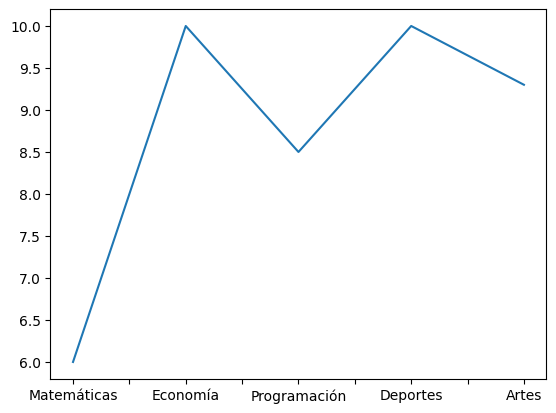

In [77]:
display(serie)
serie.plot()

# <center>**ORDENAR DATAFRAME BASADO EN LOS VALORES DE COLUMNAS**</center>

In [78]:
base = json.sort_values(by=['Lider','Id'], ascending=False)[0:10]
base

Id  Lider Mamíferos                         Reptiles            Peces  \
78  79    101   Ratones                       Camaleones           Atunes   
71  72    101    Ovejas           Dinosaurios (extintos)       Esturiones   
31  32    101    Cabras  Lagartos voladores australianos         Bacalaos   
87  88    100    Ovejas               Lagartijas comunes    Koi japoneses   
8    9    100  Ballenas               Lagartijas comunes  Anguilas de mar   
10  11     99     Orcas               Dragones de Komodo           Carpas   
22  23     97   Ratones               Boas constrictoras         Bacalaos   
18  19     97     Vacas          Pterosaurios (extintos)          Pirañas   
70  71     94    Ovejas               Boas constrictoras    Koi japoneses   
45  46     94  Canguros                       Cocodrilos           Atunes   

                   Anfibios                 Aves  
78         Sapos corredores          Pavorreales  
71                  Proteos           Avestruces  
31        Ranas arborícolas  Pájaros carpinteros  
87      Ranas de Seychelles                Loros  
8                   Proteos              Águilas  
10               Gallipatos             Gaviotas  
22    Lisorofios (extintos)                Loros  
18     Ranas toro africanas              Buitres  
70            Sapos comunes              Tucanes  
45  Sapos de caña venenosos             Faisanes

# <center>**CONVERTIR A MAYUSCULAS, MINUSCULAS O TITULO LOS VALORES DE UNA COLUMNA**</center>

In [79]:
base.Mamíferos.str.upper()

78     RATONES
71      OVEJAS
31      CABRAS
87      OVEJAS
8     BALLENAS
10       ORCAS
22     RATONES
18       VACAS
70      OVEJAS
45    CANGUROS
Name: Mamíferos, dtype: object

In [80]:
base.Mamíferos.str.lower()

78     ratones
71      ovejas
31      cabras
87      ovejas
8     ballenas
10       orcas
22     ratones
18       vacas
70      ovejas
45    canguros
Name: Mamíferos, dtype: object

In [81]:
base.Mamíferos.str.title()

78     Ratones
71      Ovejas
31      Cabras
87      Ovejas
8     Ballenas
10       Orcas
22     Ratones
18       Vacas
70      Ovejas
45    Canguros
Name: Mamíferos, dtype: object

# <center>**VALIDAR SI EXISTEN VALORES EN UNA COLUMNA**</center>
## <center>**SENSIBLE AL CASO**</center>

In [82]:
display(base)

Id  Lider Mamíferos                         Reptiles            Peces  \
78  79    101   Ratones                       Camaleones           Atunes   
71  72    101    Ovejas           Dinosaurios (extintos)       Esturiones   
31  32    101    Cabras  Lagartos voladores australianos         Bacalaos   
87  88    100    Ovejas               Lagartijas comunes    Koi japoneses   
8    9    100  Ballenas               Lagartijas comunes  Anguilas de mar   
10  11     99     Orcas               Dragones de Komodo           Carpas   
22  23     97   Ratones               Boas constrictoras         Bacalaos   
18  19     97     Vacas          Pterosaurios (extintos)          Pirañas   
70  71     94    Ovejas               Boas constrictoras    Koi japoneses   
45  46     94  Canguros                       Cocodrilos           Atunes   

                   Anfibios                 Aves  
78         Sapos corredores          Pavorreales  
71                  Proteos           Avestruces  
31        Ranas arborícolas  Pájaros carpinteros  
87      Ranas de Seychelles                Loros  
8                   Proteos              Águilas  
10               Gallipatos             Gaviotas  
22    Lisorofios (extintos)                Loros  
18     Ranas toro africanas              Buitres  
70            Sapos comunes              Tucanes  
45  Sapos de caña venenosos             Faisanes

In [83]:
base.Mamíferos.isin(['leones','hienas'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

In [84]:
base.Mamíferos.isin(['Leones','Hienas'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

In [85]:
base.Mamíferos.str.upper().isin(['LEONES','HIENAS'])

78    False
71    False
31    False
87    False
8     False
10    False
22    False
18    False
70    False
45    False
Name: Mamíferos, dtype: bool

# <center>OBTENER LA INFORMACION DE LAS **FILAS** DE UN DATAFRAME</center>
## <center> **LIMIT & OFFSET** DE UN DATAFRAME</center>

# <center>PRIMERAS  **n FILAS**</center>

In [86]:
# LIMIT
df1.head(7)

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes  Lagartijas comunes   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36

# <center>TODOS LOS VALORES EXCEPTO LAS PRIMERAS **n FILAS**</center>

In [87]:
# OFFSET
df1.tail(-93)

insertada  insertada   Id  Lider Mamíferos             Reptiles  \
93       8649       8649   94     32    Hienas   Dragones de Komodo   
94       8836       8836   95     17    Hienas           Camaleones   
95       9025       9025   96     74    Perros  Tortugas terrestres   
96       9216       9216   97     23     Gatos   Dragones de Komodo   
97       9409       9409   98     86    Ovejas           Cocodrilos   
98       9604       9604   99     55   Jirafas           Cocodrilos   
99       9801       9801  100     24    Cabras              Iguanas   

          Peces                 Anfibios                 Aves nueva columna  \
93   Esturiones     Ranas toro africanas              Buitres             ~   
94  Peces globo          Ranas venenosas              Tucanes                
95     Bacalaos                 Cecilias  Pájaros carpinteros                
96    Tiburones  Microsaurios (extintos)             Canarios                
97   Peces luna               Gallipatos  Pájaros carpinteros                
98   Peces sapo          Ranas venenosas             Faisanes                
99    Tiburones                  Proteos          Pavorreales                

    insertada  
93       8649  
94       8836  
95       9025  
96       9216  
97       9409  
98       9604  
99       9801

# <center>ULTIMAS  **n FILAS**</center>

In [88]:
df1.tail(7)

insertada  insertada   Id  Lider Mamíferos             Reptiles  \
93       8649       8649   94     32    Hienas   Dragones de Komodo   
94       8836       8836   95     17    Hienas           Camaleones   
95       9025       9025   96     74    Perros  Tortugas terrestres   
96       9216       9216   97     23     Gatos   Dragones de Komodo   
97       9409       9409   98     86    Ovejas           Cocodrilos   
98       9604       9604   99     55   Jirafas           Cocodrilos   
99       9801       9801  100     24    Cabras              Iguanas   

          Peces                 Anfibios                 Aves nueva columna  \
93   Esturiones     Ranas toro africanas              Buitres             ~   
94  Peces globo          Ranas venenosas              Tucanes                
95     Bacalaos                 Cecilias  Pájaros carpinteros                
96    Tiburones  Microsaurios (extintos)             Canarios                
97   Peces luna               Gallipatos  Pájaros carpinteros                
98   Peces sapo          Ranas venenosas             Faisanes                
99    Tiburones                  Proteos          Pavorreales                

    insertada  
93       8649  
94       8836  
95       9025  
96       9216  
97       9409  
98       9604  
99       9801

# <center>TODOS LOS VALORES EXCEPTO LAS ULTIMAS **n FILAS**</center>

In [89]:
df1.head(-93)

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes  Lagartijas comunes   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36

# <center>MUESTREO ALEATORIO  **n FILAS**</center>

In [90]:
df1.sample(7)

insertada  insertada   Id  Lider  Mamíferos  \
82       6724       6724   83     39    Jirafas   
20        400        400   21     45  Elefantes   
70       4900       4900   71     35    Jirafas   
14        196        196   15     34   Canguros   
32       1024       1024   33     33   Canguros   
99       9801       9801  100     24     Cabras   
19        361        361   20     70     Cabras   

                           Reptiles                  Peces  \
82                          Varanos              Lenguados   
20           Mosasaurios (extintos)  Los tiburones ballena   
70  Lagartos voladores australianos        Anguilas de mar   
14               Tortugas galápagos                 Atunes   
32                          Iguanas              Tiburones   
99                          Iguanas              Tiburones   
19        Tuátaras de Nueva Zelanda      Las agujas de río   

                 Anfibios                 Aves nueva columna  insertada  
82        Ranas venenosas             Faisanes             s       6724  
20  Lisorofios (extintos)             Gallinas             5        400  
70               Necturos             Cóndores             g       4900  
14       Sapos corredores              Águilas             /        196  
32               Cecilias             Gaviotas             A       1024  
99                Proteos          Pavorreales                    9801  
19               Ajolotes  Pájaros carpinteros             4        361

# <center>OPERACIONES SOBRE TODAS LAS FILAS O COLUMNAS **EJES X y Y**</center>

In [91]:
ejes = pd.DataFrame(df1, columns=['Lider','Id']).head(5)

ValueError: cannot reindex on an axis with duplicate labels

# <center>EJE X **AXIS=0 - AXIS=ROWS**</center>

In [92]:
display(ejes)
ejes.mean(axis=0)

NameError: name 'ejes' is not defined

In [93]:
ejes.mean(axis='rows')

NameError: name 'ejes' is not defined

# <center>EJE Y  **AXIS=1 - AXIS=COLUMNS**</center>

In [94]:
display(ejes)
ejes.mean(axis=1)

NameError: name 'ejes' is not defined

In [95]:
ejes.mean(axis='columns')

NameError: name 'ejes' is not defined

# <center>**MODIFICAR VALORES DE UN DATAFRAME EN MEMORIA**</center>
## <center>**INPLACE** TRUE vs FALSE, **COPY**</center>

In [96]:
import pandas as pd
inicial = pd.DataFrame({
        "object": ["TV","RADIO","CELL PHONE"], "state": ["OFF","PLAYING","BLOCKED"]
    })
inicial

object    state
0          TV      OFF
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**False** valor por defecto</center>

In [97]:
final_inplace_false = inicial.replace({"OFF": "ON"}, inplace=False)
display(inicial,final_inplace_false)

object    state
0          TV      OFF
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**True**</center>
### <center>**AL USAR TRUE RETORNA VACIO, ENTONCES NO SE DEBE GUARDAR EN UNA VARIABLE**</center>

In [98]:
final_inplace_true = inicial.replace({"OFF": "ON"}, inplace=True)

print('retorna de la variable ->', final_inplace_true)

display(inicial)
display(final_inplace_true)

retorna de la variable -> None


object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

None

### <center>**APLICAR DIRECTAMENTE SOBRE LA VARIABLE PARA VER LOS CAMBIOS EN AMBAS VARIABLES**</center>

In [99]:
final_inplace_true = inicial
final_inplace_true.replace({"OFF": "ON"}, inplace=True)
display(inicial,final_inplace_true)

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

### <center>**COPY**</center>

In [100]:
inicial_copia = inicial.copy()
inicial_copia

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

In [101]:
inicial_copia.replace({"ON": "WAITING"}, inplace=True)
display(inicial,inicial_copia)

object    state
0          TV       ON
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

object    state
0          TV  WAITING
1       RADIO  PLAYING
2  CELL PHONE  BLOCKED

# <center>FILTRAR LA INFORMACION DE UN DATAFRAME</center>

In [102]:
dataframe_to_filter = df1.head(10)
dataframe_to_filter

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes  Lagartijas comunes   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

# <center>**USANDO ETIQUETAS**</center>

## <center>**LOCK**</center>

In [103]:
# selecciona filas
display(dataframe_to_filter.loc[5:10])

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
5         25         25   6     20     Orcas  Tortugas galápagos   
6         36         36   7      7   Jirafas  Lagartijas comunes   
7         49         49   8     79  Caballos             Víboras   
8         64         64   9     87   Gorilas            Luciones   
9         81         81  10     29   Ratones  Tortugas acuáticas   

                   Peces                 Anfibios       Aves nueva columna  \
5           Peces payaso                  Proteos  Pelícanos             &   
6  Los tiburones ballena           Sapos gigantes   Lechuzas             '   
7                 Atunes                 Cecilias    Cuervos             (   
8            Peces globo      Ranas de Seychelles   Cóndores             )   
9           Peces payaso  Sapos de caña venenosos   Gallinas             *   

   insertada  
5         25  
6         36  
7         49  
8         64  
9         81

In [104]:
dataframe_to_filter.columns.to_list()

['insertada',
 'insertada',
 'Id',
 'Lider',
 'Mamíferos',
 'Reptiles',
 'Peces',
 'Anfibios',
 'Aves',
 'nueva columna',
 'insertada']

In [105]:
display(dataframe_to_filter.loc[5:10,'Lider':'Peces'])

Lider Mamíferos            Reptiles                  Peces
5     20     Orcas  Tortugas galápagos           Peces payaso
6      7   Jirafas  Lagartijas comunes  Los tiburones ballena
7     79  Caballos             Víboras                 Atunes
8     87   Gorilas            Luciones            Peces globo
9     29   Ratones  Tortugas acuáticas           Peces payaso

In [106]:
display(dataframe_to_filter.loc[5:10,'Lider'::2])

Lider            Reptiles                 Anfibios nueva columna
5     20  Tortugas galápagos                  Proteos             &
6      7  Lagartijas comunes           Sapos gigantes             '
7     79             Víboras                 Cecilias             (
8     87            Luciones      Ranas de Seychelles             )
9     29  Tortugas acuáticas  Sapos de caña venenosos             *

# <center>**USANDO INDICES**</center>

## <center>**ILOCK**</center>

In [107]:
# selecciona filas y columnas simultaneamente
dataframe_to_filter.iloc[5:10]

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
5         25         25   6     20     Orcas  Tortugas galápagos   
6         36         36   7      7   Jirafas  Lagartijas comunes   
7         49         49   8     79  Caballos             Víboras   
8         64         64   9     87   Gorilas            Luciones   
9         81         81  10     29   Ratones  Tortugas acuáticas   

                   Peces                 Anfibios       Aves nueva columna  \
5           Peces payaso                  Proteos  Pelícanos             &   
6  Los tiburones ballena           Sapos gigantes   Lechuzas             '   
7                 Atunes                 Cecilias    Cuervos             (   
8            Peces globo      Ranas de Seychelles   Cóndores             )   
9           Peces payaso  Sapos de caña venenosos   Gallinas             *   

   insertada  
5         25  
6         36  
7         49  
8         64  
9         81

In [108]:
dataframe_to_filter.iloc[5:10,1:5]

insertada  Id  Lider Mamíferos
5         25   6     20     Orcas
6         36   7      7   Jirafas
7         49   8     79  Caballos
8         64   9     87   Gorilas
9         81  10     29   Ratones

In [109]:
dataframe_to_filter.iloc[5:10,1::2]

insertada  Lider            Reptiles                 Anfibios nueva columna
5         25     20  Tortugas galápagos                  Proteos             &
6         36      7  Lagartijas comunes           Sapos gigantes             '
7         49     79             Víboras                 Cecilias             (
8         64     87            Luciones      Ranas de Seychelles             )
9         81     29  Tortugas acuáticas  Sapos de caña venenosos             *

### <center>**AT, IAT, OBTENER VALOR DEL CONTENIDO ESPECIFICO DE UNA FILA-COLUMNA**</center>

In [110]:
dataframe_to_filter.at[2,'Anfibios']

'Sapos de caña venenosos'

In [111]:
dataframe_to_filter.iat[2,5]

'Lagartijas comunes'

In [112]:
dataframe_to_filter.iat[2,5] = 'RANAS'
dataframe_to_filter

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

### <center>**TAKE OBTENER LAS FILAS O COLUMNAS CON UN INDICE ESPECIFICO**</center>

In [113]:
dataframe_to_filter.take([1,5], axis='rows')

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
1          1          1   2     22    Cabras          Cocodrilos   
5         25         25   6     20     Orcas  Tortugas galápagos   

          Peces             Anfibios       Aves nueva columna  insertada  
1   Peces globo  Salamandras comunes    Tucanes             "          1  
5  Peces payaso              Proteos  Pelícanos             &         25

In [114]:
dataframe_to_filter.take([1,5], axis='columns')

insertada            Reptiles
0          0             Iguanas
1          1          Cocodrilos
2          4               RANAS
3          9             Iguanas
4         16          Cocodrilos
5         25  Tortugas galápagos
6         36  Lagartijas comunes
7         49             Víboras
8         64            Luciones
9         81  Tortugas acuáticas

In [115]:
dataframe_to_filter.take([-1,-2], axis='columns')

insertada nueva columna
0          0             !
1          1             "
2          4             #
3          9             $
4         16             %
5         25             &
6         36             '
7         49             (
8         64             )
9         81             *

### <center>**SLICING DATAFRAME**</center>

In [116]:
dataframe_to_filter[5:10]

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
5         25         25   6     20     Orcas  Tortugas galápagos   
6         36         36   7      7   Jirafas  Lagartijas comunes   
7         49         49   8     79  Caballos             Víboras   
8         64         64   9     87   Gorilas            Luciones   
9         81         81  10     29   Ratones  Tortugas acuáticas   

                   Peces                 Anfibios       Aves nueva columna  \
5           Peces payaso                  Proteos  Pelícanos             &   
6  Los tiburones ballena           Sapos gigantes   Lechuzas             '   
7                 Atunes                 Cecilias    Cuervos             (   
8            Peces globo      Ranas de Seychelles   Cóndores             )   
9           Peces payaso  Sapos de caña venenosos   Gallinas             *   

   insertada  
5         25  
6         36  
7         49  
8         64  
9         81

### <center>**CLIP REEMPLAZO DE VALORES FUERA DE LOS RANGOS**</center>

In [117]:
dataframe_to_filter[['Id','Lider']].clip(4, 50)

Id  Lider
0   4     21
1   4     22
2   4     50
3   4     50
4   5     50
5   6     20
6   7      7
7   8     50
8   9     50
9  10     29

### <center>**FILTER DATAFRAME**</center>

In [118]:
# el indice contenga
df1.filter(like='0', axis=0)

insertada  insertada  Id  Lider  Mamíferos  \
0           0          0   1     21     Hienas   
10        100        100  11     98     Perros   
20        400        400  21     45  Elefantes   
30        900        900  31     46    Ratones   
40       1600       1600  41      3    Jirafas   
50       2500       2500  51      4      Vacas   
60       3600       3600  61     49      Gatos   
70       4900       4900  71     35    Jirafas   
80       6400       6400  81     35    Ratones   
90       8100       8100  91     15    Gorilas   

                           Reptiles                  Peces  \
0                           Iguanas           Peces payaso   
10           Dinosaurios (extintos)        Anguilas de mar   
20           Mosasaurios (extintos)  Los tiburones ballena   
30               Lagartijas comunes            Peces globo   
40                       Aligátores                 Atunes   
50                       Aligátores                 Carpas   
60                Monstruos de Gila                 Atunes   
70  Lagartos voladores australianos        Anguilas de mar   
80               Boas constrictoras                 Atunes   
90               Tortugas galápagos         Peces abisales   

                   Anfibios                 Aves nueva columna  insertada  
0                  Cecilias             Faisanes             !          0  
10      Ranas de Seychelles                Loros             +        100  
20    Lisorofios (extintos)             Gallinas             5        400  
30  Microsaurios (extintos)  Pájaros carpinteros             ?        900  
40  Sapos de caña venenosos              Cuervos             I       1600  
50               Gallipatos                Pavos             S       2500  
60           Sapos gigantes              Buitres             ]       3600  
70                 Necturos             Cóndores             g       4900  
80            Sapos comunes             Cigüeñas             q       6400  
90                  Proteos                Pavos             {       8100

In [119]:
# el nombre de la columna contenga
dataframe_to_filter.filter(like='r', axis=1)

insertada  insertada  Lider     Mamíferos  insertada
0          0          0     21        Hienas          0
1          1          1     22        Cabras          1
2          4          4     87  Rinocerontes          4
3          9          9     76     Elefantes          9
4         16         16     71        Hienas         16
5         25         25     20         Orcas         25
6         36         36      7       Jirafas         36
7         49         49     79      Caballos         49
8         64         64     87       Gorilas         64
9         81         81     29       Ratones         81

# <center>**FILTRO CON CONDICIONES EN COLUMNAS**</center>

In [120]:
valores_anfibios = list(dataframe_to_filter["Anfibios"].unique())
valores_id = list(dataframe_to_filter["Id"].unique())
valores_lider = list(dataframe_to_filter["Lider"].unique())

valor_anfibio = random.choice(valores_anfibios)
valor_id = random.choice(valores_id)
valor_lider = random.choice(valores_lider)

valores_referencia = f'Anfibio -> {valor_anfibio}, Id -> {valor_id}, Lider -> {valor_lider}'
print(valores_referencia)

display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] == valor_anfibio] 

Anfibio -> Ranas de Seychelles, Id -> 8, Lider -> 87


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos  Reptiles        Peces  \
8         64         64   9     87   Gorilas  Luciones  Peces globo   

              Anfibios      Aves nueva columna  insertada  
8  Ranas de Seychelles  Cóndores             )         64

In [121]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] != valor_anfibio] 

Anfibio -> Ranas de Seychelles, Id -> 8, Lider -> 87


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
9             *         81

# <center>**OPERADOR & Y-AND**</center>

In [122]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter["Anfibios"] == valor_anfibio) & (dataframe_to_filter["Id"] >= valor_id)] 

Anfibio -> Ranas de Seychelles, Id -> 8, Lider -> 87


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos  Reptiles        Peces  \
8         64         64   9     87   Gorilas  Luciones  Peces globo   

              Anfibios      Aves nueva columna  insertada  
8  Ranas de Seychelles  Cóndores             )         64

# <center>**OPERADOR | O-OR**</center>

In [123]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter.Anfibios == valor_anfibio) | (dataframe_to_filter.Id  >= valor_id)] 

Anfibio -> Ranas de Seychelles, Id -> 8, Lider -> 87


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
7         49         49   8     79  Caballos             Víboras   
8         64         64   9     87   Gorilas            Luciones   
9         81         81  10     29   Ratones  Tortugas acuáticas   

          Peces                 Anfibios      Aves nueva columna  insertada  
7        Atunes                 Cecilias   Cuervos             (         49  
8   Peces globo      Ranas de Seychelles  Cóndores             )         64  
9  Peces payaso  Sapos de caña venenosos  Gallinas             *         81

# <center>OPERADOR **~** NEGACION </center>

In [124]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[~(dataframe_to_filter["Anfibios"] != valor_anfibio) & (dataframe_to_filter["Id"] > valor_id)] 

Anfibio -> Ranas de Seychelles, Id -> 8, Lider -> 87


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos  Reptiles        Peces  \
8         64         64   9     87   Gorilas  Luciones  Peces globo   

              Anfibios      Aves nueva columna  insertada  
8  Ranas de Seychelles  Cóndores             )         64

# <center>**USANDO FUNCIONES**</center>
## <center>**isin**</center>

In [125]:
values = [valor for valor in range(1,10,2)]
print(values)

estan = dataframe_to_filter.loc[dataframe_to_filter['Id'].isin(values)]
no_estan = dataframe_to_filter.loc[~dataframe_to_filter.Id.isin(values)]
display(estan, no_estan)

[1, 3, 5, 7, 9]


insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
2          4          4   3     87  Rinocerontes               RANAS   
4         16         16   5     71        Hienas          Cocodrilos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
8         64         64   9     87       Gorilas            Luciones   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
4             Esturiones                 Cecilias              Cuervos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
8            Peces globo      Ranas de Seychelles             Cóndores   

  nueva columna  insertada  
0             !          0  
2             #          4  
4             %         16  
6             '         36  
8             )         64

insertada  insertada  Id  Lider  Mamíferos            Reptiles  \
1          1          1   2     22     Cabras          Cocodrilos   
3          9          9   4     76  Elefantes             Iguanas   
5         25         25   6     20      Orcas  Tortugas galápagos   
7         49         49   8     79   Caballos             Víboras   
9         81         81  10     29    Ratones  Tortugas acuáticas   

             Peces                 Anfibios       Aves nueva columna  \
1      Peces globo      Salamandras comunes    Tucanes             "   
3  Anguilas de mar   Salamandras sin pulmón   Canarios             $   
5     Peces payaso                  Proteos  Pelícanos             &   
7           Atunes                 Cecilias    Cuervos             (   
9     Peces payaso  Sapos de caña venenosos   Gallinas             *   

   insertada  
1          1  
3          9  
5         25  
7         49  
9         81

## <center>**str.contains**</center>

In [126]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.contains("Los")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
6         36         36   7      7   Jirafas  Lagartijas comunes   

                   Peces        Anfibios      Aves nueva columna  insertada  
6  Los tiburones ballena  Sapos gigantes  Lechuzas             '         36

In [127]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.contains("Los")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

             Peces                 Anfibios                 Aves  \
0     Peces payaso                 Cecilias             Faisanes   
1      Peces globo      Salamandras comunes              Tucanes   
2       Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3  Anguilas de mar   Salamandras sin pulmón             Canarios   
4       Esturiones                 Cecilias              Cuervos   
5     Peces payaso                  Proteos            Pelícanos   
7           Atunes                 Cecilias              Cuervos   
8      Peces globo      Ranas de Seychelles             Cóndores   
9     Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
7             (         49  
8             )         64  
9             *         81

## <center>**str.lower().str.contains, str.upper().str.contains**</center>

In [128]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.lower().str.contains("los")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
6         36         36   7      7   Jirafas  Lagartijas comunes   

                   Peces        Anfibios      Aves nueva columna  insertada  
6  Los tiburones ballena  Sapos gigantes  Lechuzas             '         36

In [129]:
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.upper().str.contains("LOS")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

             Peces                 Anfibios                 Aves  \
0     Peces payaso                 Cecilias             Faisanes   
1      Peces globo      Salamandras comunes              Tucanes   
2       Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3  Anguilas de mar   Salamandras sin pulmón             Canarios   
4       Esturiones                 Cecilias              Cuervos   
5     Peces payaso                  Proteos            Pelícanos   
7           Atunes                 Cecilias              Cuervos   
8      Peces globo      Ranas de Seychelles             Cóndores   
9     Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
7             (         49  
8             )         64  
9             *         81

## <center>**str.contains.startswith**</center>

In [130]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.startswith("Los")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
6         36         36   7      7   Jirafas  Lagartijas comunes   

                   Peces        Anfibios      Aves nueva columna  insertada  
6  Los tiburones ballena  Sapos gigantes  Lechuzas             '         36

## <center>**str.contains.endswith**</center>

In [131]:
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.endswith("es")]

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  
0             !          0  
1             "          1  
2             #          4  
3             $          9  
4             %         16  
5             &         25  
6             '         36  
7             (         49  
8             )         64  
9             *         81

insertada  insertada  Id  Lider Mamíferos    Reptiles       Peces  \
4         16         16   5     71    Hienas  Cocodrilos  Esturiones   
7         49         49   8     79  Caballos     Víboras      Atunes   

   Anfibios     Aves nueva columna  insertada  
4  Cecilias  Cuervos             %         16  
7  Cecilias  Cuervos             (         49

## <center>**str.contains. INSENSIBLE AL CASO**</center>

In [132]:
dataframe_to_filter[dataframe_to_filter.Peces.fillna('').str.contains("ES", case=False)]

insertada  insertada  Id  Lider Mamíferos            Reptiles  \
0          0          0   1     21    Hienas             Iguanas   
1          1          1   2     22    Cabras          Cocodrilos   
4         16         16   5     71    Hienas          Cocodrilos   
5         25         25   6     20     Orcas  Tortugas galápagos   
6         36         36   7      7   Jirafas  Lagartijas comunes   
7         49         49   8     79  Caballos             Víboras   
8         64         64   9     87   Gorilas            Luciones   
9         81         81  10     29   Ratones  Tortugas acuáticas   

                   Peces                 Anfibios       Aves nueva columna  \
0           Peces payaso                 Cecilias   Faisanes             !   
1            Peces globo      Salamandras comunes    Tucanes             "   
4             Esturiones                 Cecilias    Cuervos             %   
5           Peces payaso                  Proteos  Pelícanos             &   
6  Los tiburones ballena           Sapos gigantes   Lechuzas             '   
7                 Atunes                 Cecilias    Cuervos             (   
8            Peces globo      Ranas de Seychelles   Cóndores             )   
9           Peces payaso  Sapos de caña venenosos   Gallinas             *   

   insertada  
0          0  
1          1  
4         16  
5         25  
6         36  
7         49  
8         64  
9         81

## <center>**TRANSFORM, APPLY, MAP, APPLYMAP**</center>

In [133]:
diccionario = {
'numeros':['uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece','catorce','quince','dieciseis','diecisiete','dieciocho','diecinueve','veinte'],
'colores':['amarillo','azul','rojo','verde','morado','amarillo','azul','rojo','verde','morado']*2,
'frutas':['manzana','fresa','banano','coco','banano','manzana','fresa','banano','fresa','coco']*2,
'planeta':['mercurio','venus','tierra','tierra','mercurio','venus','tierra','mercurio','tierra','marte']*2,
'costo':[costo for costo in range(2,22,2)]*2,
'valores':[valor for valor in range(1,21)],

}

validar = pd.DataFrame(diccionario)
validar

numeros   colores   frutas   planeta  costo  valores
0          uno  amarillo  manzana  mercurio      2        1
1          dos      azul    fresa     venus      4        2
2         tres      rojo   banano    tierra      6        3
3       cuatro     verde     coco    tierra      8        4
4        cinco    morado   banano  mercurio     10        5
5         seis  amarillo  manzana     venus     12        6
6        siete      azul    fresa    tierra     14        7
7         ocho      rojo   banano  mercurio     16        8
8        nueve     verde    fresa    tierra     18        9
9         diez    morado     coco     marte     20       10
10        once  amarillo  manzana  mercurio      2       11
11        doce      azul    fresa     venus      4       12
12       trece      rojo   banano    tierra      6       13
13     catorce     verde     coco    tierra      8       14
14      quince    morado   banano  mercurio     10       15
15   dieciseis  amarillo  manzana     venus     12       16
16  diecisiete      azul    fresa    tierra     14       17
17   dieciocho      rojo   banano  mercurio     16       18
18  diecinueve     verde    fresa    tierra     18       19
19      veinte    morado     coco     marte     20       20

### <center>**TRANSFORM**</center>
#### <center>pasa cada columna como una serie a la función personalizada.</center>
### <center>**APLICA A TODA LA SERIE**</center>

In [134]:
def duplicar(row):
    
    size = len(row)
    print(type(row),size, row.values)
    return row*2 if size > 4 else row

validar.transform(duplicar)

<class 'pandas.core.series.Series'> 20 ['uno' 'dos' 'tres' 'cuatro' 'cinco' 'seis' 'siete' 'ocho' 'nueve' 'diez'
 'once' 'doce' 'trece' 'catorce' 'quince' 'dieciseis' 'diecisiete'
 'dieciocho' 'diecinueve' 'veinte']
<class 'pandas.core.series.Series'> 20 ['amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo' 'azul' 'rojo'
 'verde' 'morado' 'amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo'
 'azul' 'rojo' 'verde' 'morado']
<class 'pandas.core.series.Series'> 20 ['manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana' 'fresa' 'banano'
 'fresa' 'coco' 'manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana'
 'fresa' 'banano' 'fresa' 'coco']
<class 'pandas.core.series.Series'> 20 ['mercurio' 'venus' 'tierra' 'tierra' 'mercurio' 'venus' 'tierra'
 'mercurio' 'tierra' 'marte' 'mercurio' 'venus' 'tierra' 'tierra'
 'mercurio' 'venus' 'tierra' 'mercurio' 'tierra' 'marte']
<class 'pandas.core.series.Series'> 20 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]
<class 'pandas.core.series.Ser

numeros           colores          frutas           planeta  \
0                 unouno  amarilloamarillo  manzanamanzana  mercuriomercurio   
1                 dosdos          azulazul      fresafresa        venusvenus   
2               trestres          rojorojo    bananobanano      tierratierra   
3           cuatrocuatro        verdeverde        cocococo      tierratierra   
4             cincocinco      moradomorado    bananobanano  mercuriomercurio   
5               seisseis  amarilloamarillo  manzanamanzana        venusvenus   
6             sietesiete          azulazul      fresafresa      tierratierra   
7               ochoocho          rojorojo    bananobanano  mercuriomercurio   
8             nuevenueve        verdeverde      fresafresa      tierratierra   
9               diezdiez      moradomorado        cocococo        martemarte   
10              onceonce  amarilloamarillo  manzanamanzana  mercuriomercurio   
11              docedoce          azulazul      fresafresa        venusvenus   
12            trecetrece          rojorojo    bananobanano      tierratierra   
13        catorcecatorce        verdeverde        cocococo      tierratierra   
14          quincequince      moradomorado    bananobanano  mercuriomercurio   
15    dieciseisdieciseis  amarilloamarillo  manzanamanzana        venusvenus   
16  diecisietediecisiete          azulazul      fresafresa      tierratierra   
17    dieciochodieciocho          rojorojo    bananobanano  mercuriomercurio   
18  diecinuevediecinueve        verdeverde      fresafresa      tierratierra   
19          veinteveinte      moradomorado        cocococo        martemarte   

    costo  valores  
0       4        2  
1       8        4  
2      12        6  
3      16        8  
4      20       10  
5      24       12  
6      28       14  
7      32       16  
8      36       18  
9      40       20  
10      4       22  
11      8       24  
12     12       26  
13     16       28  
14     20       30  
15     24       32  
16     28       34  
17     32       36  
18     36       38  
19     40       40

### <center>**APLICA A TODA LA COLUMNA**</center>

In [135]:
validar.costo.transform(duplicar)

<class 'pandas.core.series.Series'> 20 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]


costo
Loading... (need help?)


### <center>**APLICA A TODA LA FILA**</center>

In [136]:
validar.loc[0].transform(duplicar)

<class 'pandas.core.series.Series'> 6 ['uno' 'amarillo' 'manzana' 'mercurio' 2 1]


numeros              unouno
colores    amarilloamarillo
frutas       manzanamanzana
planeta    mercuriomercurio
costo                     4
valores                   2
Name: 0, dtype: object

### <center>**GENERAR NUEVAS COLUMNAS**</center>

In [137]:
validar['doble'] = validar.valores.transform(duplicar)
validar

<class 'pandas.core.series.Series'> 20 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


numeros   colores   frutas   planeta  costo  valores  doble
0          uno  amarillo  manzana  mercurio      2        1      2
1          dos      azul    fresa     venus      4        2      4
2         tres      rojo   banano    tierra      6        3      6
3       cuatro     verde     coco    tierra      8        4      8
4        cinco    morado   banano  mercurio     10        5     10
5         seis  amarillo  manzana     venus     12        6     12
6        siete      azul    fresa    tierra     14        7     14
7         ocho      rojo   banano  mercurio     16        8     16
8        nueve     verde    fresa    tierra     18        9     18
9         diez    morado     coco     marte     20       10     20
10        once  amarillo  manzana  mercurio      2       11     22
11        doce      azul    fresa     venus      4       12     24
12       trece      rojo   banano    tierra      6       13     26
13     catorce     verde     coco    tierra      8       14     28
14      quince    morado   banano  mercurio     10       15     30
15   dieciseis  amarillo  manzana     venus     12       16     32
16  diecisiete      azul    fresa    tierra     14       17     34
17   dieciocho      rojo   banano  mercurio     16       18     36
18  diecinueve     verde    fresa    tierra     18       19     38
19      veinte    morado     coco     marte     20       20     40

### <center>**SOPORTA MULTIPLES FUNCIONES A EVALUAR SIMULTANEAMENTE**</center>

In [138]:
validar.transform(['sqrt','exp'])

costo                 valores                   doble              
        sqrt           exp      sqrt           exp      sqrt           exp
0   1.414214  7.389056e+00  1.000000  2.718282e+00  1.414214  7.389056e+00
1   2.000000  5.459815e+01  1.414214  7.389056e+00  2.000000  5.459815e+01
2   2.449490  4.034288e+02  1.732051  2.008554e+01  2.449490  4.034288e+02
3   2.828427  2.980958e+03  2.000000  5.459815e+01  2.828427  2.980958e+03
4   3.162278  2.202647e+04  2.236068  1.484132e+02  3.162278  2.202647e+04
5   3.464102  1.627548e+05  2.449490  4.034288e+02  3.464102  1.627548e+05
6   3.741657  1.202604e+06  2.645751  1.096633e+03  3.741657  1.202604e+06
7   4.000000  8.886111e+06  2.828427  2.980958e+03  4.000000  8.886111e+06
8   4.242641  6.565997e+07  3.000000  8.103084e+03  4.242641  6.565997e+07
9   4.472136  4.851652e+08  3.162278  2.202647e+04  4.472136  4.851652e+08
10  1.414214  7.389056e+00  3.316625  5.987414e+04  4.690416  3.584913e+09
11  2.000000  5.459815e+01  3.464102  1.627548e+05  4.898979  2.648912e+10
12  2.449490  4.034288e+02  3.605551  4.424134e+05  5.099020  1.957296e+11
13  2.828427  2.980958e+03  3.741657  1.202604e+06  5.291503  1.446257e+12
14  3.162278  2.202647e+04  3.872983  3.269017e+06  5.477226  1.068647e+13
15  3.464102  1.627548e+05  4.000000  8.886111e+06  5.656854  7.896296e+13
16  3.741657  1.202604e+06  4.123106  2.415495e+07  5.830952  5.834617e+14
17  4.000000  8.886111e+06  4.242641  6.565997e+07  6.000000  4.311232e+15
18  4.242641  6.565997e+07  4.358899  1.784823e+08  6.164414  3.185593e+16
19  4.472136  4.851652e+08  4.472136  4.851652e+08  6.324555  2.353853e+17

### <center>**solo manipula una sola fila o columna en función del valor del eje y no manipula el dataframe completo.**</center>

In [139]:
validar.transform(lambda row: row.costo + row.valores)

AssertionError: 

In [149]:
validar.transform(lambda row: row.costo + row.valores, axis=1)

ValueError: Function did not transform

### <center>**NO SOPORTA FUNCIONES DE AGREGADO**</center>

In [ ]:
validar.transform(lambda x: x.sum())

In [ ]:
validar.doble.transform(lambda x: x.sum())

### <center>**APPLY**</center>
#### <center>se usa para aplicar una función a lo largo de un eje de un DataFrame o en valores de Series</center>
#### <center>pasa implícitamente todas las columnas de cada grupo como un DataFrame a la función personalizada.</center>

In [ ]:
validar.apply(duplicar)

### <center>**SOPORTA FUNCIONES DE AGREGADO**</center>

In [ ]:
validar.apply(lambda x:x.sum())

In [ ]:
validar.apply(lambda x:x.max())

### <center>**USANDO LAS COLUMNAS DE UN DATAFRAME**</center>
# sino se declara el eje columnas o el eje y recorre la serie por columnas, entonces no se puede acceder a los nombres de las columnas

In [147]:
limite = 10
dff = df1.head(limite)

def funcion_concatenar(row):
    mamiferos = row.Mamíferos
    reptiles  = row.Reptiles
    
    return mamiferos + ' y ' + reptiles

dff.apply(funcion_concatenar)

AttributeError: 'Series' object has no attribute 'Mamíferos'

In [146]:
dff.apply(funcion_concatenar, axis=1)

0
Loading... (need help?)


### <center>**ADICIONANDO LAS COLUMNAS DE UN DATAFRAME**</center>


In [148]:
dff['suma_columnas'] = dff.apply(lambda row: row[0]+row[1], axis='columns')
display(dff)

insertada  insertada  Id  Lider     Mamíferos            Reptiles  \
0          0          0   1     21        Hienas             Iguanas   
1          1          1   2     22        Cabras          Cocodrilos   
2          4          4   3     87  Rinocerontes               RANAS   
3          9          9   4     76     Elefantes             Iguanas   
4         16         16   5     71        Hienas          Cocodrilos   
5         25         25   6     20         Orcas  Tortugas galápagos   
6         36         36   7      7       Jirafas  Lagartijas comunes   
7         49         49   8     79      Caballos             Víboras   
8         64         64   9     87       Gorilas            Luciones   
9         81         81  10     29       Ratones  Tortugas acuáticas   

                   Peces                 Anfibios                 Aves  \
0           Peces payaso                 Cecilias             Faisanes   
1            Peces globo      Salamandras comunes              Tucanes   
2             Barracudas  Sapos de caña venenosos  Pájaros carpinteros   
3        Anguilas de mar   Salamandras sin pulmón             Canarios   
4             Esturiones                 Cecilias              Cuervos   
5           Peces payaso                  Proteos            Pelícanos   
6  Los tiburones ballena           Sapos gigantes             Lechuzas   
7                 Atunes                 Cecilias              Cuervos   
8            Peces globo      Ranas de Seychelles             Cóndores   
9           Peces payaso  Sapos de caña venenosos             Gallinas   

  nueva columna  insertada  suma_columnas  
0             !          0              0  
1             "          1              2  
2             #          4              8  
3             $          9             18  
4             %         16             32  
5             &         25             50  
6             '         36             72  
7             (         49             98  
8             )         64            128  
9             *         81            162

In [ ]:
dff['suma_columnas_multiplicadas'] = dff.apply(lambda row: row[0]*5 + row[1]*2, axis=1)
dff

### <center>**USANDO LAS FILAS DE UN DATAFRAME**</center>

In [ ]:
dff = df1.head(10)


dff.Id = dff.Id.apply(lambda x: 'Es Menor a 5' if x < 5 else x)
dff

In [ ]:
dff = df1.head(10)

def es_par(valor):
    
    if valor %2 == 0:
        return 'Es Par'
    return valor

dff.Id = dff.Id.apply(es_par)
dff

### <center>**APLICAR SOBRE TODAS LAS COLUMNAS QUE TIENEN EL MISMO TIPO DE DATO**</center>

In [ ]:
dff.apply(lambda x: 'Es Menor a 5' if x < 5 else x)

In [ ]:
dff.apply(lambda x: 'Es Menor a 5' if type(x) else x!=int)

### <center>**GENERAR MULTIPLES COLUMNAS EN UN DATAFRAME**</center>

In [ ]:
%%time
# generar fechas aleatorias entre 2 fechas
dff['Fechas'] = pd.date_range(start='1/1/2000 00:00:00', end='1/1/2023 00:00:00', periods=limite)

def fecha(fecha):
    return pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second])

dff[["year", "month", "day", 'hour', 'minute', 'second']] = dff.Fechas.apply(fecha)

dff

In [ ]:
dff["y"], dff["m"], dff["d"], dff["h"], dff["d"], dff["s"] = dff.Fechas.apply(lambda fecha: pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second]))

dff

### <center>**UNIENDO VALORES DE MULTIPLES COLUMNAS DE UN DATAFRAME**</center>

In [ ]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider)

### <center>**DEFINIENDO EL EJE DE UNION EN UN DATAFRAME**</center>

In [ ]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider, axis='columns')
dff

### <center>**MAP**</center>
#### <center>usado para substituir el valor en una serie con otro valor</center>

In [ ]:
# usando la serie de una fila
validar.loc[0].map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

In [ ]:
# usando la serie de una columna
validar.planeta.map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

### <center>**APPLYMAP**</center>
#### <center>se usa para aplicar una función a cada elemento del DataFrame</center>

In [ ]:
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row)
    return row*2 if size > 4 else row

validar.applymap(duplicar)

## <center>**WHERE**</center>

In [ ]:
#https://sparkbyexamples.com/pandas/pandas-dataframe-where-examples/
#https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/
#https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/


filtro_1 = dataframe_to_filter.Id > 5
filtro_2 = dataframe_to_filter.Lider > 33
filtro_3 = dataframe_to_filter.Id * 2 < dataframe_to_filter.Lider

In [ ]:
print(type(filtro_1))
print(filtro_1)
dataframe_to_filter.where(filtro_1)

### <center>**DROP NA**</center>

In [ ]:
print(filtro_1)
dataframe_to_filter.where(filtro_1)

In [ ]:
print(filtro_1)
dataframe_to_filter.where(filtro_1).dropna()

## <center>**AND, &**</center>

In [ ]:
print(filtro_1)
print(filtro_3)

dataframe_to_filter.where(filtro_1 & filtro_3).dropna()

## <center>**OR,  |**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
dataframe_to_filter.where(filtro_1 | filtro_2).dropna()

## <center>**UPDATE** AL VALOR QUE NO CUMPLA LA CONDICION</center>

### <center>**ACTUALIZA SOLO LOS VALORES DONDE COINCIDA, COMPARA CADA FILA EN TODO EL DATAFRAME**</center>

In [ ]:
# filtra todos los valores dentro del dataframe
filtro_4 = dataframe_to_filter != 'Vacas'
print(filtro_4)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_4,'ACTUALIZADO')

### <center>**ACTUALIZA TODOS LOS VALORES DE LA FILA DONDE COINCIDA AL MENOS UN VALOR EN UNA FILA**</center>

In [ ]:
filtro_5 = dataframe_to_filter.Lider != 6
print(filtro_5)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_5,'ACTUALIZADO')

## <center>**QUERY**</center>

In [ ]:
filtro_1 = 'Id > 5'
filtro_2 = 'Lider > 33'
filtro_3 = 'Id * 5 < Lider'

## <center>**PASANDO VALORES**</center>

## <center>**IGUAL A ==**</center>

In [ ]:
print(valores_referencia)
value = valor_anfibio

dataframe_to_filter.query("Anfibios == @value")

## <center>**DIFERENTE DE !=**</center>

In [ ]:
print(valores_referencia)
dataframe_to_filter.query("Anfibios != @value")

## <center>**QUE CONTENGA LOS VALORES DE LA LISTA, IN**</center>

In [ ]:
print(valores_referencia)
lista= ['Ranas arcoíris','Ajolotes','Salamandras comunes']
dataframe_to_filter.query("Anfibios in @lista")

## <center>**QUE NO CONTENGA LOS VALORES DE LA LISTA, NOT IN**</center>

In [ ]:
dataframe_to_filter.query("Anfibios not in @lista")

## <center>**OPERADORES LOGICOS CLASICOS**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
display(dataframe_to_filter.query(filtro_1))
display(dataframe_to_filter.query(filtro_2))

## <center>**AND**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_2} and {filtro_3}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_3}')

## <center>**OR**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_3}')

# <center>**UNIR O CONCATENAR DATAFRAMES**</center>

# <center>**OUTER**</center>

In [ ]:
pd.concat([json[0:3], csv[0:5]], axis=1, join="outer")

In [ ]:
pd.concat([json[0:3], csv[0:5]], axis=0, join="outer")

# <center>**INNER**</center>

In [ ]:
pd.concat([json[0:3], csv[0:5]], axis=1, join="inner")

In [ ]:
pd.concat([json[0:3], csv[0:5]], axis=0, join="inner")

# <center>**COMPARACION POR DATAFRAMES**</center>

In [ ]:
pd.concat([json[0:3], csv[0:3], excel[0:3]])

In [ ]:
pd.concat([json[0:3], csv[0:3], excel[0:3]], keys=["json_base", "csv_base", "excel_base"])

# <center>**ELIMINAR COLUMNAS DUPLICADAS**</center>

In [ ]:
columnas_repetidas = pd.concat([json[0:3], csv[0:3]], axis=1, join="outer")

columnas_sin_repetir = columnas_repetidas.T.drop_duplicates().T

columnas_sin_repetir_2 = columnas_repetidas.loc[:,~columnas_repetidas.columns.duplicated()]

display(columnas_repetidas, columnas_sin_repetir, columnas_sin_repetir_2)

# <center>**ELIMINAR FILAS REPETIDAS**</center>

## <center>**SOLO MANTIENE LA PRIMERA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'])

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='first')

## <center>**SOLO MANTIENE LA ULTIMA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep='last')

## <center>**SOLO MANTIENE LAS FILAS QUE NO TIENEN INFORMACION REPETIDA**</center>

In [ ]:
dataframe_to_filter.drop_duplicates(subset=['Lider'], keep=False)

## <center>**SOLO MANTIENE LA FILA REPETIDA ENCONTRADA BASADA EN LA CONDICION DEFINIDA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
# Elimina dejando el PRIMERO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces']).sort_values(by=['Id'], ascending=False)

In [ ]:
# Elimina dejando el ULTIMO del orden ascendente de Mamíferos
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_values(by=['Id'], ascending=False)

In [ ]:
# ORDENA POR EL INDICE ASCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index()

In [ ]:
# ORDENA POR EL INDICE DESCENDENTE
dataframe_to_filter.sort_values('Mamíferos', ascending=True).drop_duplicates(['Peces'], keep='last').sort_index(ascending=False)

# <center>**JOINS**</center>

# <center>**SELF, INNER, LEFT, RIGHT, OUTER, CROSS, INDEX**</center>

In [ ]:
json_base, csv_base, excel_base = df1.head(5), df2.head(7), df3.head(10)

# <center>**SELF** JOIN</center>

In [ ]:
dataframe_self_join = df3.head(20)
display(dataframe_self_join)
join_dataframe(dataframe_self_join, dataframe_self_join, tipo_de_join='SELF',self_join=['Id','Lider']).dropna()

# <center>**INNER** JOIN</center>

In [ ]:
display(json_base, csv_base)

join_dataframe(json_base, csv_base, llaves_para_join= ['Id'], tipo_de_join='INNER')

In [ ]:
pd.merge(json_base, csv_base, on=["Id"])

## <center>**INNER** JOIN **Multiples Llaves**</center>

In [ ]:
display(csv, excel)

join_dataframe(csv, excel, llaves_para_join= ['Id','Lider'], tipo_de_join='INNER')

In [ ]:
pd.merge(csv, excel, on=['Id','Lider'])

In [ ]:
pd.merge_ordered(df2, df3, on=['Id','Lider'])

In [ ]:
pd.merge(df2.drop_duplicates(), df3.drop_duplicates(), on=['Id','Lider'], how='left', indicator=False)

# <center>**LEFT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='LEFT')

# <center>**RIGHT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='RIGHT')

# <center>**OUTER** JOIN</center>

In [ ]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, llaves_para_join = ['Id'], tipo_de_join='OUTER', mostrar_tipo_join=True)

## <center>**ELIMINAR COLUMNAS DUPLICADAS Y PERSONALIZAR LOS ALIAS EN COLUMNAS QUE SE VAN A DUPLICAR** MERGE</center>

### <center>**USANDO LLAVES ESPECIFICAS PARA EL JOIN** MERGE</center>

In [ ]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, 
                 on=['Id','Lider'], how='outer')
merge_eliminar_columnas_dulicadas

### <center>**USANDO DESCUBRIMIENTO AUTOMATICO DE LLAVES PARA EL JOIN** MERGE **PERSONALIZANDO EL NOMBRE DEL ALIAS O SUFIJO PARA COLUMNAS DUPLICADAS** </center>

In [ ]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))
merge_eliminar_columnas_dulicadas

In [ ]:
# elimina las columnas con el prefijo especifico
merge_eliminar_columnas_dulicadas.drop(merge_eliminar_columnas_dulicadas.filter(regex='_y$').columns, axis=1, inplace=True)
merge_eliminar_columnas_dulicadas

# <center>**CROSS** JOIN</center>

In [ ]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, 'Id', tipo_de_join='CROSS')

# <center>**INDEX** JOIN</center>

In [ ]:
display(csv_base, json_base)
join_dataframe(csv_base, json_base, tipo_de_join='INDEX')

In [ ]:
pd.merge(csv[0:10], json[0:10], left_index=True, right_index=True)

# <center>**DIVIDIR UNA COLUMNA EN OTRAS COLUMNAS USANDO UN CARACTER ESPECIFICO**</center>

In [ ]:
json_base.Anfibios.str.split(" ", expand=True)

In [ ]:
json_base.Anfibios.str.split(" ", n = 1, expand=True)

# <center>**OPERACIONES SOBRE UNA COLUMNA DE UN DATAFRAME**</center>

In [ ]:
import random

valores= {'numeros':[random.randint(-10, 10) for numero in range(10)]}
dataset_numeros = pd.DataFrame(valores)

print(valores)
print(f'total numeros SIN VALORES NULOS {dataset_numeros["numeros"].count()}')
print(f'suma de los numeros {dataset_numeros["numeros"].sum()}')
print(f'media {dataset_numeros["numeros"].mean()}')
print(f'desviacion media absoluta {dataset_numeros["numeros"].mad()}')
print(f'mediana {dataset_numeros["numeros"].median()}')

print(f'minimo {dataset_numeros["numeros"].min()}')
print(f'maximo {dataset_numeros["numeros"].max()}')

print(f'moda {dataset_numeros["numeros"].mode()}')
print(f'valor absoluto {dataset_numeros["numeros"].abs()}')

# <center>**DATASET PELICULAS**</center>

In [ ]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/rotten_tomatoes_movies.csv'

# carga el dataset
dataset_peliculas = pd.read_csv(archivo)

# creo una columna como index
dataset_peliculas['index'] = range(0,dataset_peliculas.shape[0])
dataset_peliculas = dataset_peliculas.set_index('index')
print(dataset_peliculas.columns.to_list())

# define las etiquetas con que se crearan las nuevas columnas 
etiquetas_actores = ["PROTAGONISTA", "CO_PROTAGONISTA", "TERCER_PROTAGONISTA", "ACTORES_DE_REPARTO"]
etiquetas_directores = ["DIRECTOR_PRINCIPAL", "DIRECTOR_SECUNDARIO", "DIRECTORES_AUXILIARES"]
etiquetas_generos = ["GENERO_PRINCIPAL", "GENERO_SECUNDARIO", "GENEROS_AUXILIARES"]

# crea unos nuevos datasets con las columnas requeridas
actores = dataset_peliculas.actors.str.split(",", n = 3, expand = True).rename(columns={indice:actor for indice, actor in enumerate(etiquetas_actores)})
directores = dataset_peliculas.directors.str.split(",", n = 2, expand = True).rename(columns={indice:director for indice, director in enumerate(etiquetas_directores)})
generos = dataset_peliculas.genres.str.split(",", n = 2, expand = True).rename(columns={indice:genero for indice, genero in enumerate(etiquetas_generos)})

# une los dataframes en 1 solo
actores_directores_generos = pd.merge(pd.merge(actores, directores, left_index=True, right_index=True), generos, left_index=True, right_index=True)
dataset_completo  = pd.merge(dataset_peliculas, actores_directores_generos, left_index=True, right_index=True)

# elimina las columnas que ya fueron divididas
dataset_depurado = dataset_completo.drop(columns=['actors','directors','genres'])
print('--------------------------------')
print(dataset_depurado.columns.to_list())

In [ ]:
dataset_depurado.describe()

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmax()
duracion = dataset_depurado[columna_base].max()

# metodo ._get_value()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MAS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmin()
duracion = dataset_depurado[columna_base].min()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MENOS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**GROUP BY**</center>
## <center>**AGRUPAMIENTO MULTICOLUMNA**</center>

In [ ]:
nobel = pd.read_csv('https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/nobel_prize.csv')
nobel_reducido = nobel[['awardYear', 'category', 'prizeAmount', 'prizeAmountAdjusted', 'name', 'gender', 'birth_continent']]
nobel_reducido.head()

## <center>**GENERA UN OBJETO DataFrameGroupBy SIN USAR CORCHETES EN EL GROUP BY"**</center>

In [ ]:
https://www.dataquest.io/blog/grouping-data-a-step-by-step-tutorial-to-groupby-in-pandas/
grouped = nobel_reducido.groupby(by='category')
grouped

In [ ]:
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_objetivo)
agrupacion_por_genero.get_group('Economic Sciences')

In [ ]:
grouped.get_group('Economic Sciences')


In [ ]:
UNSTACK - GROUPBY
https://www.geeksforgeeks.org/pandas-groupby-unstack/#:~:text=Pandas%20Unstack%20is%20a%20function,()%20pivots%20the%20indexed%20column.

## <center>**GENERA UNA SERIE, FILTRANDO CON UN INDICE, "CON UN SOLO CORCHETE"**</center>

In [ ]:
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[columna_objetivo].sum()
type(agrupacion_por_genero)
#agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)

## <center>**GENERA UN DATAFRAME, FILTRANDO CON UNA COLUMNA, "CON DOBLE CORCHETE"**</center>

In [ ]:
print(dataset_depurado.columns.to_list())
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['tomatometer_fresh_critics_count']]
columna_base = ['GENERO_PRINCIPAL','PROTAGONISTA','DIRECTOR_PRINCIPAL']
columna_objetivo = 'audience_rating'
agrupacion_por_genero = dataset_depurado.groupby(by=columna_base)[[columna_objetivo]].sum()
agrupacion_por_genero.sort_values(by=columna_objetivo, ascending=False)
type(agrupacion_por_genero)

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmax()
rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
print(columna_base, columna_objetivo)
genero = agrupacion_por_genero[columna_objetivo].idxmin()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MENOS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'GENERO_PRINCIPAL'
columna_objetivo = 'audience_rating'

genero = agrupacion_por_genero[columna_objetivo].idxmax()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]
# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR PROMEDIO DE UNA COLUMNA**</center>
## <center>**FILTRO MULTICOLUMNA**</center>

In [ ]:
columna_base = 'DIRECTOR_PRINCIPAL'
columna_objetivo = 'audience_count'
columna_objetivo2 = 'audience_rating'

agrupacion_por_director = dataset_depurado.groupby(by=columna_base)[[columna_objetivo,columna_objetivo2]].mean()
agrupacion_por_director.sort_values(by=columna_objetivo, ascending=False)

# <center>**AGRUPAR Y ENCONTRAR EL MAXIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmax()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR EL MINIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmin()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR LA MEDIA**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mean()))

# <center>**AGRUPAR Y ENCONTRAR LA MODA**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.mode()))

# <center>**AGRUPAR Y CONTAR**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.count()))

# <center>**AGRUPAR Y SUMAR**</center>

In [ ]:
display(dataset_depurado.get('rating',dataset_depurado.runtime.sum()))

# <center>**FUNCIONES SOBRE EL AGRUPADO**</center>

In [ ]:
limite = 100
valores = {'departamento':[random.choice(['Bebes','Adolescentes','Adultos','Adultos Mayores','Mascotas']) for valor in range(limite)],
 'publico':[random.choice(['Niña','Niño','Hombre','Mujer']) for valor in range(limite)],
 'disponibilidad':[valor * random.randint(1,1000) for valor in range(limite)],
 'precio':[valor * random.randint(1,100) for valor in range(limite)]
}

ejemplo = pd.DataFrame(valores)
ejemplo

# <center>**AGRUPAR**</center>

In [ ]:
ej = ejemplo.groupby(['publico','departamento'])

# <center>**INFORMACION DE AGRUPADO**</center>

In [ ]:
ej.groups

In [ ]:
ej.indices

### <center>**MAXIMO**</center>

In [ ]:
valor = ej.idxmax()
display(valor)
indice = valor[0:1].disponibilidad.values[0]
ejemplo[indice:indice+1]

### <center>**MINIMO**</center>

In [ ]:
valor = ej.idxmin()
display(valor)
indice = valor[0:1].precio.values[0]
ejemplo[indice:indice+1]

In [ ]:
ej.plot()

# <center>**FUNCIONES DE AGREGADO**</center>

In [ ]:
ej.sum()

In [ ]:
# count,size,sum,mean,average,std,var,sem,describe,min,max,first,last,nth
ej.agg(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

In [ ]:
ej.aggregate(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

# <center>**STACK, UNSTACK**</center>

In [ ]:
ejemplo.stack(['departamento'])

In [ ]:
ej.sum().unstack()

In [ ]:
ej.sum().unstack(['publico'])

# GRAFICOS

# <center>**HABILITAR PLOTLY EN PANDAS**</center>

In [ ]:
datos_graficas = df1.sample(10)
datos_graficas

In [ ]:
print(datos_graficas.Peces)
df_otro = pd.DataFrame(datos_graficas, columns=['Lider','Peces'])
df_otro= df_otro.set_index('Peces')

df_otro.plot.pie(y ='Lider')
#df_otro

In [ ]:
! pip install cufflinks 

In [ ]:
pd.options.plotting.backend = "plotly"
pd.options.plotting.backend = 'matplotlib'

import numpy as np
# Let's create a random data with numpy
df = pd.DataFrame(np.random.rand(200, 4), columns='A B C D'.split())

# check the data once
df.head()

# <center>**GRAFICO LINEAS**</center>

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(subplots=True)

In [ ]:
df.plot()

In [ ]:
df.plot(kind='line')

In [ ]:
df.plot.line(backend='plotly')

# <center>**GRAFICO DISPERSION**</center>

In [ ]:
df.plot.scatter(x='A', y='B')

In [ ]:
pd.options.plotting.backend = "plotly"
df.plot.scatter(x='A', y='B')

# <center>**GRAFICO DE BARRAS VERTICALES**</center>

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df.plot.bar()

# <center>**GRAFICO DE BARRAS HORIZONTALES**</center>

In [ ]:
# muestra el valor acumulado de una columna

df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 5.97 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])

df.plot.barh(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 500 , 1297]},
                  index=['Mercury', 'Venus', 'Earth'])

#df.plot.hist(backend='plotly')
df.plot.hist()

In [ ]:
df.plot.hist(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [3.87, 3.87 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])
df.hist()

In [ ]:
x = pd.DataFrame({'valores':[-5,-98,-3,-3,-3,-3,-1, 8, 13, 98], 'index':list('abcdeftyui')})
x = x.set_index('index')
x.plot.bar(backend='plotly')

In [ ]:
len(list('abcdeftyui'))

# <center>**GRAFICO DE AREA**</center>

In [ ]:
df.plot.area(backend='plotly')

# <center>**GRAFICO DE HISTOGRAMA**</center>

In [ ]:
df.plot.hist(backend='plotly')

# <center>**GRAFICO DE CAJA**</center>

In [ ]:
df.plot.box(backend='plotly')

In [ ]:
#!pip install plotly
#!pip install seaborn

import pandas as pd
#pd.options.plotting.backend = "plotly"

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

In [ ]:
df[['total_bill', 'tip', 'size']].plot(kind='line')

In [ ]:
df.plot(kind='scatter', x='total_bill', y='tip')

In [ ]:
df['day'].value_counts().plot(kind='bar')

In [ ]:
df[['total_bill', 'tip']].plot(kind='hist')

In [ ]:
df[['total_bill', 'tip']].plot(kind='box')

In [ ]:
df[['total_bill', 'tip']].plot(kind='area')

In [ ]:
df.groupby('day')['day', 'total_bill'].sum().reset_index().plot(kind='pie', x='day', y='total_bill');

In [ ]:
df['day'].value_counts().plot_bokeh(kind='bar', alpha=0.7);

In [ ]:
df['total_bill'].plot_bokeh(kind='hist', bins=10, alpha=0.7);

In [ ]:
df[['total_bill', 'tip']].plot_bokeh(kind='area', alpha=0.6);

In [ ]:
import plotly.tools as tls
tls.embed('https://plotly.com/~chris/7365')